# 情報量
情報量はエントロピーとも呼ばれ、あるできごとがどれほど起こりにくいかを表す尺度です。  
機械学習で、2つの確率分布の隔たりを表すのに使います。

### 情報量とは？

それぞれのできごとの情報量だけでなく、できごとの情報量の平均値も情報量と呼ぶことがあります。  
前者を選択情報量（自己エントロピー）、後者を平均情報量（エントロピー）と呼びます。  

情報量はあるできごとがどれほど起こりにくいかを表す尺度ですが、有用性を表す尺度ではありません。  
例えば、1/100で当たるルーレットの賞金が1億円であっても0円であっても、情報量に違いはありません。  

### 選択情報量
できごとEが起きた時の選択情報量は、次の式で表されます。

$$  I(E) = -\log_2 P(E) $$

$P(E)$はEが起きる確率です。  
このように、選択情報量は確率の対数として表されます。  
対数の底には2を使うことが多いですが、底には何を選んでも本質的に違いはありません。

上記の式を2の累乗の形で表すと次のようになります。

$$ P(E) = \frac{1}{2^{I(E)}} $$

例えば両面が表の特殊なコインを投げる場合、「表の面が上になる」というできごとが起きる確率は1なので、選択情報量は$-\log_2 1$で0となります。  
通常の、片面が表で片面が裏のコインを投げる場合「表の面が上になる」というできごとが起きる確率は1/2なので、選択情報量は$-\log_2 \frac{1}{2}$で1となります。  

このように、できごとの確率が小さくなるほど情報量は大きくなります。

### 選択情報量をグラフ化
 
横軸を確率、縦軸を選択情報量としたグラフを描画します。  
底が2の対数は、NumPyのlog2関数で計算できます。

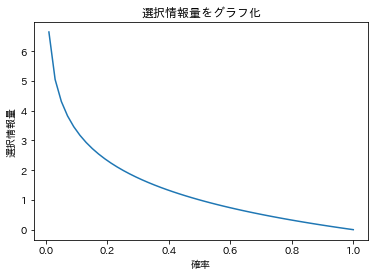

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def entropy(x):
    return -np.log2(x)  # 選択情報量

x = np.linspace(0.01, 1)  # 0の対数はとれないので0.01に
y = entropy(x)

plt.plot(x, y)
plt.xlabel('確率')
plt.ylabel('選択情報量')
plt.title('選択情報量をグラフ化')
plt.show()

確率の上昇に伴い選択情報量は単調に減少しています。  
また、確率が0に近くなるとなると選択情報量が無限に増えていきます。  
確率が1になると、選択情報量は0になります。  
選択情報量が出来事の起こりにくさを表す尺度であることが分かります。

また、選択情報量には「和をとれる」という性質があります。  
トランプの例を考えてみましょう。  
ジョーカー抜きの52枚から、スペードの1を引く確率は、1/52です。  
従って、選択情報量は$-\log_2 \frac{1}{52} = \log_2 52$となります。  
このとき、$-\log \frac{1}{a} = \log a$という関係を使っています。  

また、スペードを引く確率は1/4なので、選択情報量は$-\log_2 \frac{1}{4} = \log_2 4$となります。  
1を引く確率は1/13なので、選択情報量は$-\log_2 \frac{1}{13} = \log_2 13$となります。

$\log a + \log b = \log ab$の関係により、

$$\log_2 4 + \log_2 13 = \log_2 52$$

となって、「スペードを引く」の選択情報量と「1を引く」の選択情報量の和は、「スペードの1を引く」の選択情報量と等しくなります。  
このように、選択情報量には和をとれるという便利な性質があります。

## 平均情報量
平均情報量は、次の式で定義されます。

$$H = -\sum_{k=1}^n P(E_k)\log_2 P(E_k)$$

$n$はできごとの総数で、$E_k$は各できごとを表します。  
選択情報量に、確率をかけて総和をとったものになっています。  
単にエントロピーという場合は、この平均情報量を指すことが多いです。

## 平均情報量の意味

コイン投げの例を考えましょう。  
あるコインの表が出る確率がP、裏が出る確率を1-Pとします。  
このとき、平均情報量は次のように求めることができます。

$$ H = -P\log_2 P - (1-P)\log_2 (1-P) $$

これをグラフで描画しましょう。  
以下のコードは、横軸を確率、縦軸を平均情報量としてグラフを描画します。

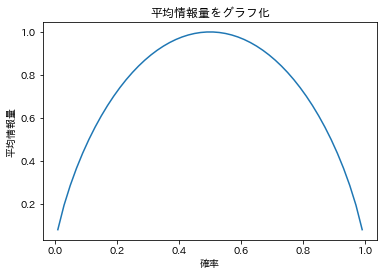

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def entropy(x):
    return -np.log2(x)  # 選択情報量

x = np.linspace(0.01, 0.99)  # 0の対数はとれないので0.01-0.99に
y = x*entropy(x) + (1-x)*entropy(1-x)  # 平均情報量

plt.plot(x, y)
plt.xlabel('確率')
plt.ylabel('平均情報量')
plt.title('平均情報量をグラフ化')
plt.show()

平均情報量はPが0と1のとき0になり、0.5で最大値の1になります。  
平均情報量は、結果の予測がしにくいときに大きく、予測がしやすいときに小さくなります。  
すなわち、あるできごとの発生確率がすべて同じとき、すなわち何が起こるか予測がつかないときに最大になります。  

また、発生確率の偏りが大きいほど平均情報量は小さくなる、と表現することもできます。  
平均情報量は、情報の無秩序さや不確実さを表す尺度でもあります。

### 演習:
以下のセルを補完し、表が上になる確率が0.6、裏が上になる確率が0.4のコインを投げることの平均情報量を求めましょう。

In [4]:
def entropy(x):
    return -np.log2(x)  # 選択情報量

p = 0.6
print(f'選択情報量: {p*entropy(p) + ((1-p)*entropy(1-p))}')  # 平均情報量を求める

選択情報量: 0.9709505944546686
